In [1]:
import numpy as np
import numpy.random as rng
import torch 
from torch.utils.data import TensorDataset, DataLoader
from copy import deepcopy 
from model import MLP_variant
from simulators import Generator_doubleNormal_lr
from simulators import Generator_doubleNormal
import matplotlib.pyplot as plt 
import time 
from scipy.stats import norm
from scipy.optimize import fsolve
from tqdm import tqdm  
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

c:\Users\97255\anaconda3\envs\pytorch\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
rho = 0
N = 50
p = 200
rng.seed(0)
Sigma = np.ones((p, p)) * rho
Sigma = Sigma + np.diag(np.ones(p) * (1-rho))
X = rng.multivariate_normal(np.zeros(p), Sigma, N)
X = X - np.mean(X, axis=0)
X = X * np.sqrt(N / np.sum(X**2, axis=0))
np.save("./data/X_rho0_N50_p200.npy", X)

In [2]:
X = np.load("./data/X_rho0_N50_p50.npy")

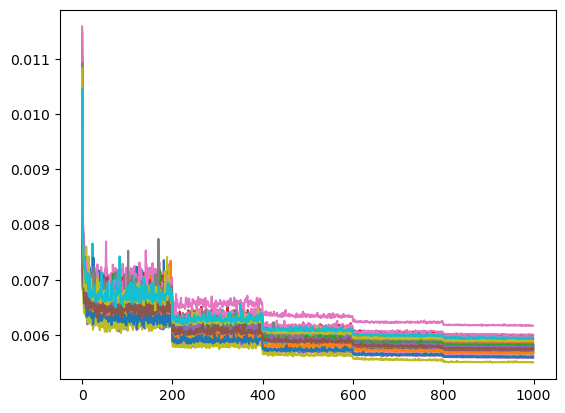

In [4]:
coordinate_loss = np.load("./results/linear regression/coordinate_loss_p50_q25_exp0.npy") 
plt.plot(coordinate_loss)
plt.show()

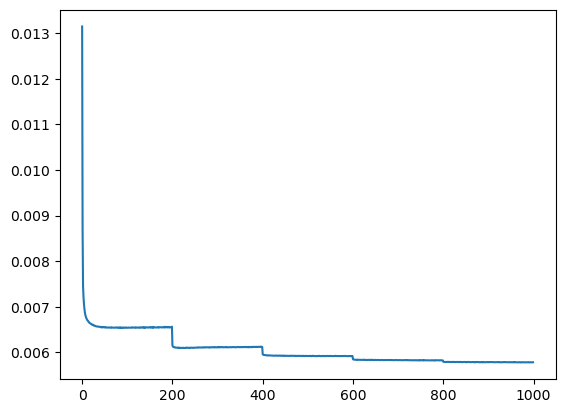

In [5]:
train_loss = np.load("./results/linear regression/train_losses_p50_q25_exp0.npy")
plt.plot(train_loss)
plt.show()

In [28]:
rho = 0
N = 50
p = 50
rng.seed(0)
Sigma = np.ones((p, p)) * rho
Sigma = Sigma + np.diag(np.ones(p) * (1-rho))
X = rng.multivariate_normal(np.zeros(p), Sigma, N)
X = X - np.mean(X, axis=0)
X = X * np.sqrt(N / np.sum(X**2, axis=0))
np.save("./data/X_rho0_N50_p50.npy", X)

# p=50

In [3]:
train_losses = np.load('./results/linear regression/train_losses_p200_q25_exp0.npy')
val_losses = np.load('./results/linear regression/val_losses_p200_q25_exp0.npy')

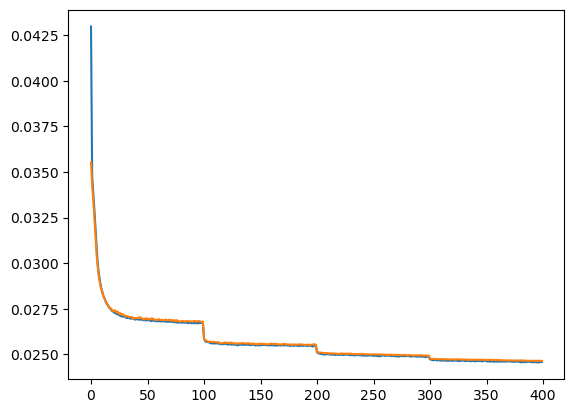

In [4]:
plt.plot(train_losses)
plt.plot(val_losses)
plt.show()

In [5]:
coordinate_loss = np.load("./results/linear regression/coordinate_loss_p200_q25_exp0.npy")

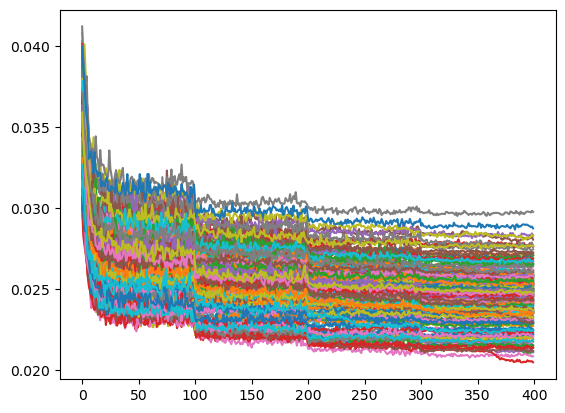

In [6]:
plt.plot(coordinate_loss)
plt.show()

In [13]:
mean = np.load("./results/mean_p50_q25_exp0.npy")
mean

array([-7.42424029e-03,  1.46540197e-03, -5.91988637e-03,  4.01072469e-03,
       -2.60670211e-03,  4.02615275e-03, -2.33799208e-03, -2.70410512e-03,
        1.22274609e-03, -1.67638261e-04, -7.72858166e-03,  5.25871144e-03,
       -4.41981630e-03,  1.02236721e-02,  5.75117707e-03, -1.80187393e-03,
       -4.27699624e-03,  2.12520993e-03, -6.11060328e-05, -8.26604612e-03,
       -3.41977553e-03,  3.28847613e-03,  2.71797040e-03, -4.26727379e-03,
        2.63348690e-03, -5.31144429e-03,  1.73750422e-03,  1.76159187e-03,
        6.15934304e-03, -2.33444195e-03, -5.09442507e-04,  7.91113053e-03,
        6.86524348e-03,  9.32738213e-04,  3.45273505e-03,  2.31579611e-03,
       -3.89607296e-03, -3.55956237e-03,  4.63078696e-03,  4.40170920e-03,
       -3.06914205e-03, -1.79889224e-03,  1.52153957e-03,  4.26476230e-03,
       -6.49922051e-03,  2.33434078e-03,  6.00017700e-03, -1.16134494e-04,
       -1.67950071e-03, -1.79748644e-03])

In [14]:
mean = np.load("./results/mean_p50_q975_exp0.npy")
mean

array([-7.42424029e-03,  1.46540197e-03, -5.91988637e-03,  4.01072469e-03,
       -2.60670211e-03,  4.02615275e-03, -2.33799208e-03, -2.70410512e-03,
        1.22274609e-03, -1.67638261e-04, -7.72858166e-03,  5.25871144e-03,
       -4.41981630e-03,  1.02236721e-02,  5.75117707e-03, -1.80187393e-03,
       -4.27699624e-03,  2.12520993e-03, -6.11060328e-05, -8.26604612e-03,
       -3.41977553e-03,  3.28847613e-03,  2.71797040e-03, -4.26727379e-03,
        2.63348690e-03, -5.31144429e-03,  1.73750422e-03,  1.76159187e-03,
        6.15934304e-03, -2.33444195e-03, -5.09442507e-04,  7.91113053e-03,
        6.86524348e-03,  9.32738213e-04,  3.45273505e-03,  2.31579611e-03,
       -3.89607296e-03, -3.55956237e-03,  4.63078696e-03,  4.40170920e-03,
       -3.06914205e-03, -1.79889224e-03,  1.52153957e-03,  4.26476230e-03,
       -6.49922051e-03,  2.33434078e-03,  6.00017700e-03, -1.16134494e-04,
       -1.67950071e-03, -1.79748644e-03])

In [15]:
std = np.load("./results/std_p50_q25_exp0.npy")

In [17]:
md_q025 = MLP_variant(50, 50, [1024, 1024], 'leakyrelu').to(device)
md_q975 = MLP_variant(50, 50, [1024, 1024], 'leakyrelu').to(device)
md_q025.load_state_dict(torch.load("./model/p50_q25_exp0.pt"))
md_q975.load_state_dict(torch.load("./model/p50_q975_exp0.pt"))

<All keys matched successfully>

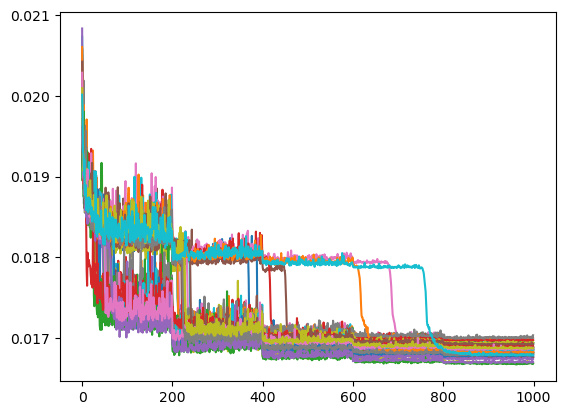

In [18]:
coordinate_loss_q025 = np.load("./results/coordinate_loss_p50_q25_exp0.npy")
plt.plot(coordinate_loss_q025)
plt.show()

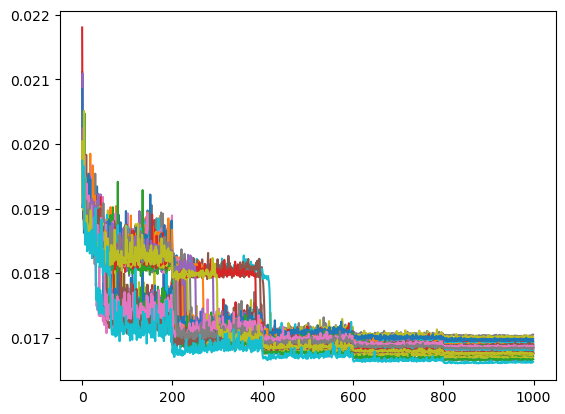

In [2]:
coordinate_loss_q975 = np.load("./results/coordinate_loss_p50_q975_exp0.npy")
plt.plot(coordinate_loss_q975)
plt.show()

In [20]:
from simulators import Generator_doubleNormal
theta = 0.05
sigma0 = 0.1
sigma1 = 5
sigma = 1
lr = 0.001 # learning rate
p = 50
generator = Generator_doubleNormal(p, theta, sigma0, sigma1)
rng.seed(1)
gamma_test, beta_test, Y_test = generator.generate_samples(1000000)
Y_test_normalized = (Y_test - mean) / std

In [21]:
true_q025 = np.load('./data/gs_q025.npy') 
true_q975 = np.load('./data/gs_q975.npy')
true_mean = np.load('./data/gs_mean.npy')

In [22]:
def predict(model, Y):
    model.eval()
    with torch.no_grad():
        data = torch.from_numpy(Y).type(torch.float).to(device)
        pred = model(data)
    return pred.detach().cpu().numpy()

In [23]:
pred_q025 = predict(md_q025, Y_test_normalized)
q025_loss = np.mean(np.maximum(0.025*(beta_test-pred_q025),0.975*(pred_q025-beta_test)), 0)
q025_loss

array([0.01692049, 0.01688972, 0.01689267, 0.01685042, 0.01681917,
       0.01699558, 0.0169211 , 0.01693691, 0.01684633, 0.01694297,
       0.01688781, 0.01671864, 0.01686128, 0.01674839, 0.01696932,
       0.01688567, 0.0169423 , 0.01690773, 0.01676829, 0.01690717,
       0.01685491, 0.01672541, 0.01693134, 0.01682032, 0.01688154,
       0.01687759, 0.01689543, 0.01687232, 0.0168253 , 0.01678513,
       0.01692947, 0.01688183, 0.01690142, 0.01693085, 0.01696865,
       0.01688599, 0.01682538, 0.01686619, 0.01693351, 0.01672398,
       0.01681419, 0.01701237, 0.01695429, 0.01679002, 0.01684752,
       0.01688275, 0.01691334, 0.01700171, 0.01686405, 0.01684737])

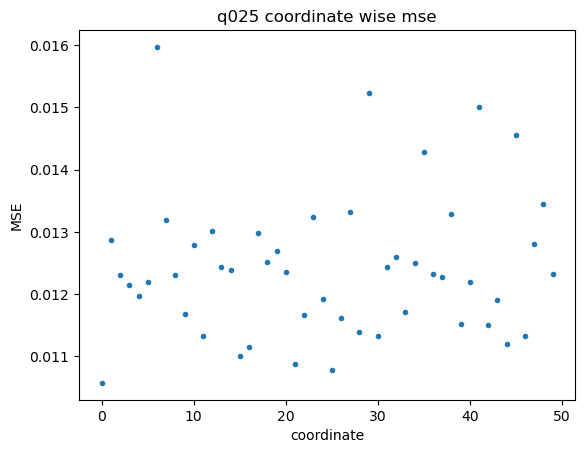

In [24]:
mse_q025 = np.mean((true_q025 - pred_q025[:10000,:])**2, 0)
plt.plot(mse_q025,'.')
plt.xlabel('coordinate')
plt.ylabel('MSE')
plt.title('q025 coordinate wise mse')
plt.show()

In [25]:
np.mean(mse_q025)

0.012408436827626717

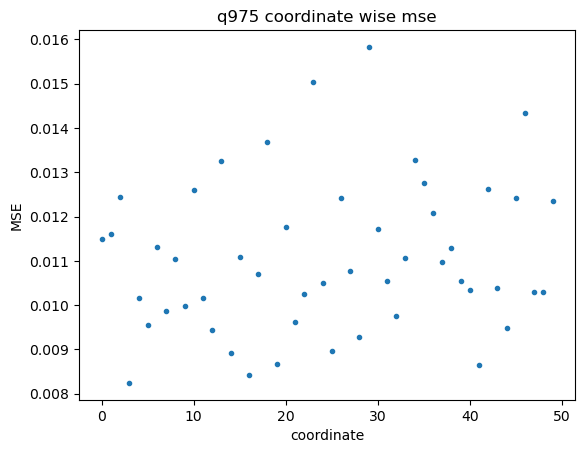

In [26]:
pred_q975 = predict(md_q975, Y_test_normalized)
mse_q975 = np.mean((true_q975 - pred_q975[:10000,:])**2, 0)
plt.plot(mse_q975,'.')
plt.xlabel('coordinate')
plt.ylabel('MSE')
plt.title('q975 coordinate wise mse')
plt.show()

In [27]:
np.mean(mse_q975)

0.011045360812373615

In [28]:
md_mean = MLP_variant(p, p, [1024, 1024], 'leakyrelu').to(device)
md_mean.load_state_dict(torch.load('./model/p50_mean_week10.pt'))
pred_mean = predict(md_mean, Y_test_normalized)

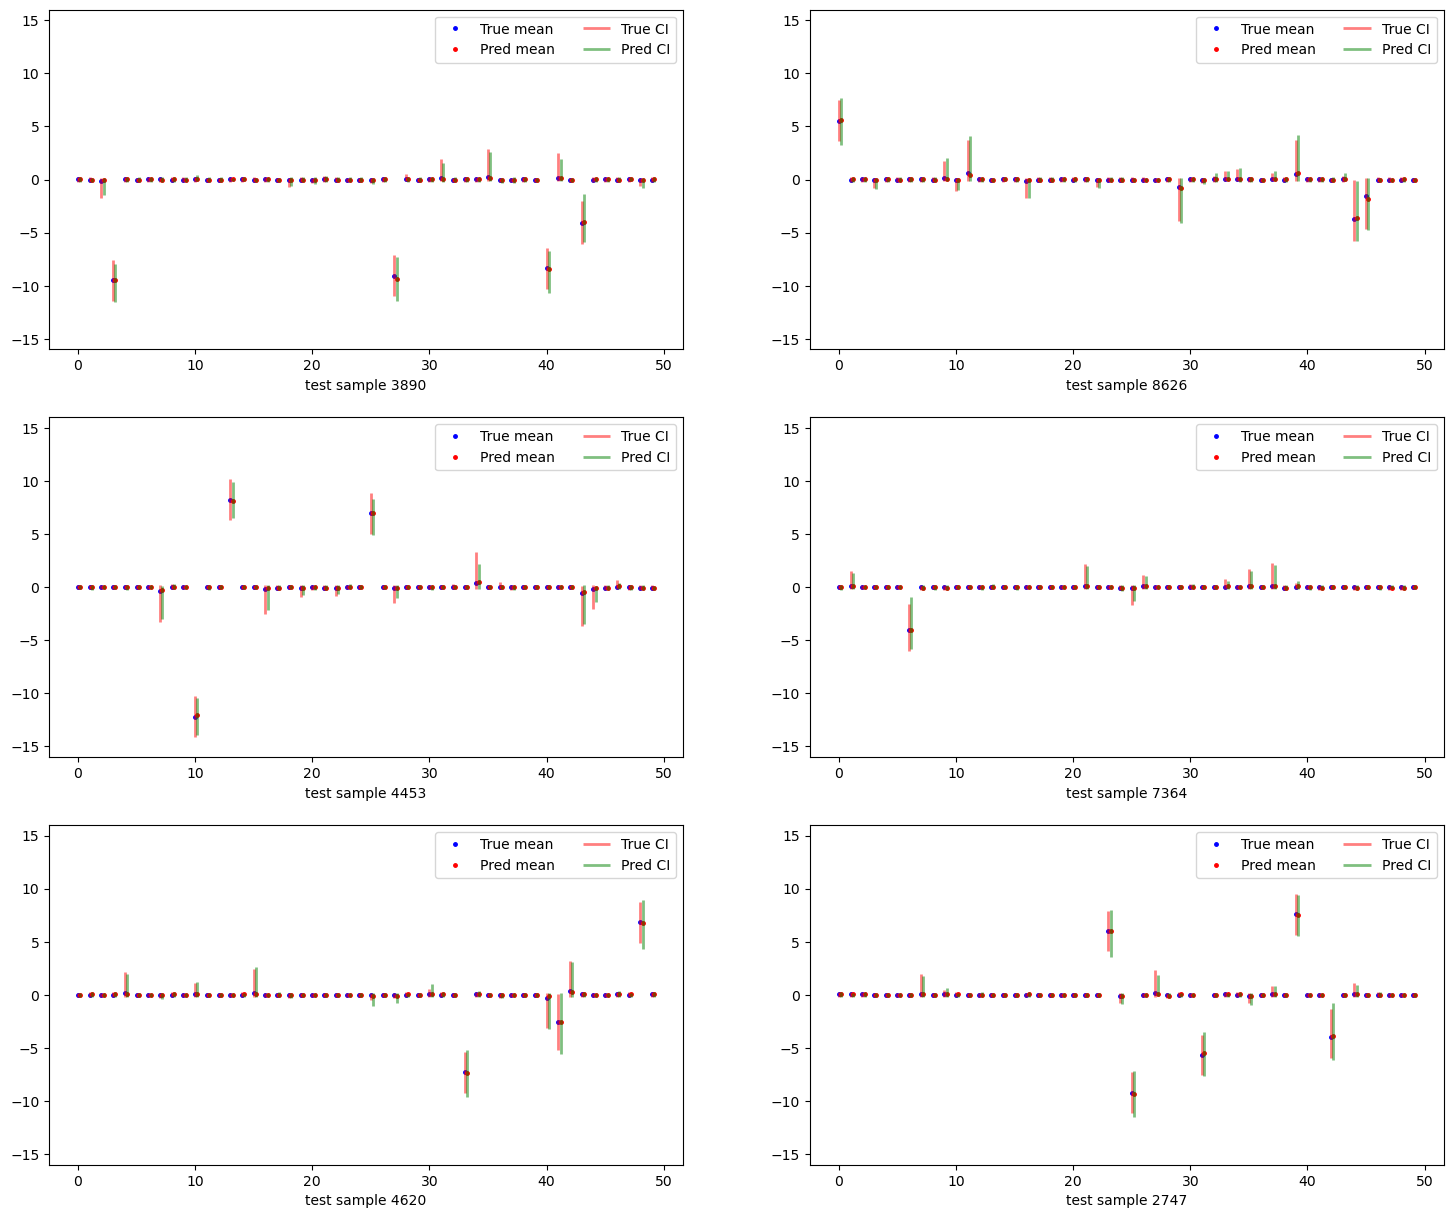

In [31]:
subset = np.where(np.abs(beta_test[:10000,:])>2)[0]
t = 1000 * time.time()
np.random.seed(int(t) % 2**32)
rng.shuffle(subset)
subset = subset[:6]    

plt.figure(figsize=(18,15))
for i, idx in enumerate(subset):
    plt.subplot(3,2,i+1)
    plt.plot(range(p), true_mean[idx], '.b', ms=5)
    plt.plot(np.arange(p)+0.2, pred_mean[idx], '.r', ms=5)
    plt.vlines(np.arange(p), true_q025[idx], true_q975[idx], color='red', alpha=0.5, lw=2)
    plt.vlines(np.arange(p)+0.2, pred_q025[idx], pred_q975[idx], color='green', alpha=0.5, lw=2)
    plt.legend(['True mean', 'Pred mean', 'True CI', 'Pred CI'], ncol=2)
    plt.ylim(-16,16)
    plt.xlabel(f'test sample {idx}')
# plt.savefig('C:/Users/97255/OneDrive/Desktop/Bayesian Inference using DL/s2048_test_figures/test_10.png')
plt.show()

# p=200

In [5]:
train_losses = np.load('./results/train_losses_p200_q25_exp0.npy')
val_losses = np.load('./results/val_losses_p200_q25_exp0.npy')  
coordinate_loss = np.load('./results/coordinate_loss_p200_q25_exp0.npy')

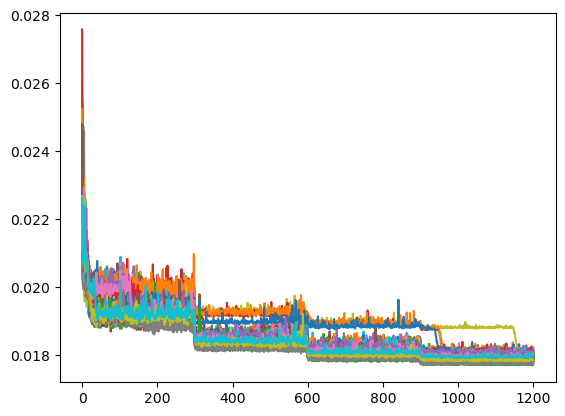

In [7]:
plt.plot(coordinate_loss)
plt.show()

In [11]:
p = 200
theta = 0.05
sigma0 = 0.1
sigma1 = 5
sigma = 1
generator = Generator_doubleNormal(p, theta, sigma0, sigma1)
rng.seed(1)
gamma_test, beta_test, Y_test = generator.generate_samples(5000)

In [13]:
'''
The posterior is also a Gaussian mixture of two components. The posterior mean is easy to compute. However, the 
quantile doesn't have close form solution. Use fsolve in scipy.optimize to solve equations for quantile.
'''
def computeNormalStats(sigma, sigma0, sigma1, Y):
    tau = 1 / sigma**2
    tau0 = 1 / sigma0**2
    tau1 = 1 / sigma1**2
    tau0_ = tau0 + tau 
    tau1_ = tau1 + tau 
    theta_ = theta / (theta + (1-theta) * np.sqrt(tau1_*tau0/(tau0_*tau1)) \
        * np.exp(-0.5 * tau**2 * (tau0_-tau1_) / (tau0_*tau1_) * Y**2))
    mu1 = tau / tau1_ * Y 
    mu0 = tau / tau0_ * Y 
    true_mean = theta_ * mu1 + (1-theta_) * mu0
    # Use different initial values according to Y to avoid solver failure.
    if np.abs(Y) > 4:
        q025 = fsolve(lambda x: theta_ * norm.cdf(x, mu1, (1/tau1_)**0.5) + (1-theta_) * norm.cdf(x, mu0, (1/tau0_)**0.5) - 0.025, Y)
        q975 = fsolve(lambda x: theta_ * norm.cdf(x, mu1, (1/tau1_)**0.5) + (1-theta_) * norm.cdf(x, mu0, (1/tau0_)**0.5) - 0.975, Y)
    else:
        q025 = fsolve(lambda x: theta_ * norm.cdf(x, mu1, (1/tau1_)**0.5) + (1-theta_) * norm.cdf(x, mu0, (1/tau0_)**0.5) - 0.025, 0)
        q975 = fsolve(lambda x: theta_ * norm.cdf(x, mu1, (1/tau1_)**0.5) + (1-theta_) * norm.cdf(x, mu0, (1/tau0_)**0.5) - 0.975, 0)        
    return true_mean, q025, q975

In [15]:
'''
Only the first 10,000 test samples are used for comparison. 
'''
true_mean = np.zeros((5000, p))
true_q025 = np.zeros((5000, p))
true_q975 = np.zeros((5000, p))

for i in tqdm(range(5000)):
    for j in range(p):
        true_mean[i,j], true_q025[i,j], true_q975[i,j] = computeNormalStats(sigma, sigma0, sigma1, Y_test[i,j])

100%|██████████| 5000/5000 [30:06<00:00,  2.77it/s]


In [16]:
np.save("./data/gs_p200_q025", true_q025)
np.save("./data/gs_p200_q975", true_q975)
np.save("./data/gs_p200_mean", true_mean)

In [17]:
mean = np.load("./results/mean_p200_q25_exp0.npy")
std = np.load("./results/std_p200_q25_exp0.npy")

In [18]:
Y_test_normalized = (Y_test - mean) / std 

In [20]:
def predict(model, Y):
    model.eval()
    with torch.no_grad():
        data = torch.from_numpy(Y).type(torch.float).to(device)
        pred = model(data)
    return pred.detach().cpu().numpy()

In [25]:
md_q025 = MLP_variant(p, p, [1024, 1024], 'leakyrelu').to(device) 
md_q025.load_state_dict(torch.load("./model/p200_q25_exp0.pt"))

<All keys matched successfully>

In [26]:
pred_q025 = predict(md_q025, Y_test_normalized)
q025_loss = np.mean(np.maximum(0.025*(beta_test-pred_q025),0.975*(pred_q025-beta_test)), 0)
q025_loss

array([0.01860388, 0.0176328 , 0.01599107, 0.01983637, 0.01792103,
       0.01955298, 0.01784137, 0.01759166, 0.01767919, 0.01823196,
       0.01884269, 0.01898429, 0.01653621, 0.01760106, 0.01839738,
       0.01853095, 0.01805473, 0.016141  , 0.0189179 , 0.01803059,
       0.02002219, 0.0177016 , 0.01749015, 0.01634005, 0.0185884 ,
       0.01823999, 0.01901904, 0.01861503, 0.01763677, 0.01871185,
       0.01728969, 0.01739702, 0.01881506, 0.01615074, 0.01971519,
       0.01747732, 0.01878291, 0.02060458, 0.02144464, 0.01784739,
       0.01529926, 0.01798076, 0.01552236, 0.01810239, 0.01719525,
       0.0192602 , 0.02039375, 0.01495317, 0.01860293, 0.01615072,
       0.0176486 , 0.01735147, 0.01646012, 0.02079626, 0.01650417,
       0.0184542 , 0.01804377, 0.01482512, 0.01645238, 0.02017279,
       0.01805706, 0.01565658, 0.01626386, 0.01885287, 0.01673201,
       0.01873406, 0.01659703, 0.01875004, 0.019691  , 0.01863304,
       0.01779435, 0.01793833, 0.01798475, 0.01981454, 0.01608

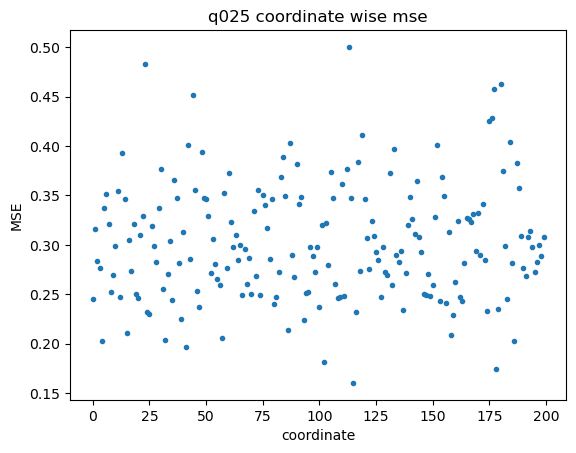

In [27]:
mse_q025 = np.mean((true_q025 - pred_q025)**2, 0)
plt.plot(mse_q025,'.')
plt.xlabel('coordinate')
plt.ylabel('MSE')
plt.title('q025 coordinate wise mse')
plt.show()